# Experiment 0. Тестирование бейзлайна для логистической регрессии

В данном проекте мы будем тестировать бейзлайн модель логистической регрессии, чтобы установить базовый уровень производительности для дальнейшего сравнения с более сложными моделями. Бейзлайн будет использовать исходные признаки без каких-либо дополнительных преобразований.

## Цель

Целью данного тестирования является определение производительности логистической регрессии на исходных данных и использование этой модели в качестве базового уровня для сравнения с другими моделями. Мы будем оценивать производительность модели с использованием метрики ROC AUC и проводить t-тест для сравнения результатов.

## Ход работы

1. **Загрузка данных**: Мы начнем с загрузки и предварительной обработки данных, чтобы подготовить их для обучения модели.

2. **Разделение данных**: Данные будут разделены на обучающую и тестовую выборки, что позволит нам оценить производительность модели на невидимых данных.

3. **Обучение бейзлайн модели**: Мы обучим логистическую регрессию на исходных данных без каких-либо преобразований.

4. **Оценка модели**: Бейзлайн модель будет оценена на тестовой выборке с использованием метрики ROC AUC. Мы будем использовать это значение как базовый уровень для сравнения с другими моделями.

5. **Многократные итерации обучения**: Мы проведем множество итераций обучения на исходных данных, чтобы оценить стабильность и надежность модели.

6. **Сравнение результатов**: Наконец, мы сравним результаты различных итераций обучения с помощью t-теста, чтобы определить, есть ли статистически значимые различия в производительности модели при использовании различных методов.

## Заключение

В результате данного тестирования мы сможем установить базовый уровень производительности для логистической регрессии и использовать его для сравнения с более сложными моделями, такими как модели с WOE-кодированием и другие алгоритмы.


In [1]:
pip install pickleshare

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 24.0 -> 25.1
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [ ]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import roc_curve, auc

from utils.roc_auc import plot_roc_curve
from utils.model_comparison import run_model_iterations

In [3]:
TARGET_COLUMN = 'TARGET'

In [4]:
data = pd.read_csv("./data/processed_data/processed_application_train.csv")

In [5]:
# Разделяем данные на признаки и целевую переменную
X = data.drop(columns=[TARGET_COLUMN])
y = data[TARGET_COLUMN]

# Разделяем данные на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Как было видно на EDA в данных много колонок содержат пропуски. Заменим их на средние (тестировались median и most_frequent, но лучше оказалось mean). Добавим этот этап в пайплайн обучения модели

In [6]:
# Обучаем логистическую регрессию
imputer = SimpleImputer(strategy='mean') 
model = LogisticRegression()

pipeline = Pipeline(steps=[('imputer', imputer), ('model', model)])
pipeline.fit(X_train, y_train)

/Users/pelageya/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('imputer', SimpleImputer()), ('model', LogisticRegression())])

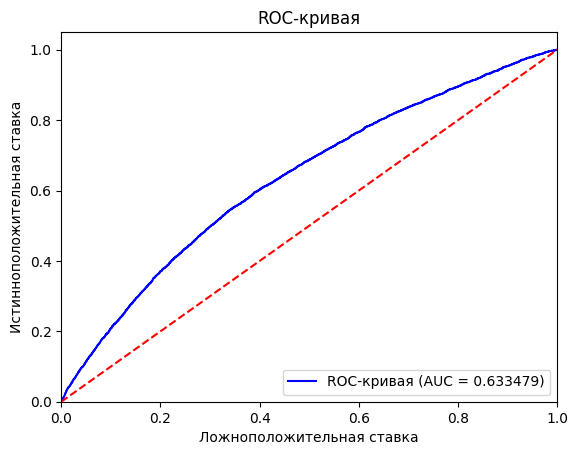

In [7]:
roc_auc = plot_roc_curve(pipeline, X_test, y_test)

In [8]:
model0_roc_auc = roc_auc

In [9]:
model0_roc_auc

0.6334792983705573

Сохраним переменную для сравнения в других ноутбуках 

In [10]:
%store model0_roc_auc

# %store -d model0_roc_auc
# %store -r model0_roc_auc

Stored 'model0_roc_auc' (float64)


Запустим обучение в несколько итераций для созранения значений метрики и статистичски значимого сравнения с последующими моделями

In [11]:
model0_roc_auc_distr = run_model_iterations(pipeline, X_train, y_train, X_test, y_test, n_iterations=100)

Training iterations:   0%|          | 0/100 [00:00<?, ?it/s]/Users/pelageya/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
Training iterations:   1%|          | 1/100 [00:08<14:09,  8.58s/it]/Users/pelageya/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html


In [14]:
%store model0_roc_auc_distr

Stored 'model0_roc_auc_distr' (ndarray)
